<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.836764,61.855744,-1847.496959,-1701.804452,350.149419,-2051.953871
1,0.0,1.0,62.447966,33.378639,261.089906,366.916511,-353.526549,720.443060
2,0.0,2.0,85.963130,93.049475,4477.447304,4666.459908,1119.969334,3546.490574
3,0.0,3.0,42.940032,67.599439,2757.326341,2877.865812,398.405662,2479.460150
4,0.0,4.0,75.710369,27.374199,841.815788,954.900357,-457.695076,1412.595432
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.268613,87.547450,-1242.135349,-1101.319286,-122.638738,-978.680549
19996,999.0,16.0,28.407381,91.113572,-1940.182673,-1810.661721,-375.919547,-1434.742174
19997,999.0,17.0,83.815309,45.455441,-713.594624,-574.323874,68.029908,-642.353782
19998,999.0,18.0,98.755946,43.119558,-474.309075,-322.433572,341.979962,-664.413534


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    73.836764  61.855744 -1847.496959 -1701.804452   350.149419   
      1.0    62.447966  33.378639   261.089906   366.916511  -353.526549   
      2.0    85.963130  93.049475  4477.447304  4666.459908  1119.969334   
      3.0    42.940032  67.599439  2757.326341  2877.865812   398.405662   
      4.0    75.710369  27.374199   841.815788   954.900357  -457.695076   
...                ...        ...          ...          ...          ...   
999.0 15.0   43.268613  87.547450 -1242.135349 -1101.319286  -122.638738   
      16.0   28.407381  91.113572 -1940.182673 -1810.661721  -375.919547   
      17.0   83.815309  45.455441  -713.594624  -574.323874    68.029908   
      18.0   98.755946  43.119558  -474.309075  -322.433572   341.979962   
      19.0   51.507379  77.934864 -1958.656958 -1819.214715  -100.282873   

                   e_hat  
rep   index               
0.0   0.0   -2051.953871  
      1.0     720.443060  
      2.0    3546.490574  
      3.0    2479.460150  
      4.0    1412.595432  
...                  ...  
999.0 15.0   -978.680549  
      16.0  -1434.742174  
      17.0   -642.353782  
      18.0   -664.413534  
      19.0  -1718.931842  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    73.836764  61.855744 -1847.496959 -1701.804452   350.149419   
      1.0    62.447966  33.378639   261.089906   366.916511  -353.526549   
      2.0    85.963130  93.049475  4477.447304  4666.459908  1119.969334   
      3.0    42.940032  67.599439  2757.326341  2877.865812   398.405662   
      4.0    75.710369  27.374199   841.815788   954.900357  -457.695076   
...                ...        ...          ...          ...          ...   
999.0 15.0   43.268613  87.547450 -1242.135349 -1101.319286  -122.638738   
      16.0   28.407381  91.113572 -1940.182673 -1810.661721  -375.919547   
      17.0   83.815309  45.455441  -713.594624  -574.323874    68.029908   
      18.0   98.755946  43.119558  -474.309075  -322.433572   341.979962   
      19.0   51.507379  77.934864 -1958.656958 -1819.214715  -100.282873   

                   e_hat  
rep   index               
0.0   0.0   -2051.953871  
      1.0     720.443060  
      2.0    3546.490574  
      3.0    2479.460150  
      4.0    1412.595432  
...                  ...  
999.0 15.0   -978.680549  
      16.0  -1434.742174  
      17.0   -642.353782  
      18.0   -664.413534  
      19.0  -1718.931842  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.836764,61.855744,-1847.496959,-1701.804452,350.149419,-2051.953871
1,0.0,1.0,62.447966,33.378639,261.089906,366.916511,-353.526549,720.443060
2,0.0,2.0,85.963130,93.049475,4477.447304,4666.459908,1119.969334,3546.490574
3,0.0,3.0,42.940032,67.599439,2757.326341,2877.865812,398.405662,2479.460150
4,0.0,4.0,75.710369,27.374199,841.815788,954.900357,-457.695076,1412.595432
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.268613,87.547450,-1242.135349,-1101.319286,-122.638738,-978.680549
19996,999.0,16.0,28.407381,91.113572,-1940.182673,-1810.661721,-375.919547,-1434.742174
19997,999.0,17.0,83.815309,45.455441,-713.594624,-574.323874,68.029908,-642.353782
19998,999.0,18.0,98.755946,43.119558,-474.309075,-322.433572,341.979962,-664.413534


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    73.836764  61.855744 -1847.496959 -1701.804452   350.149419   
      1.0    62.447966  33.378639   261.089906   366.916511  -353.526549   
      2.0    85.963130  93.049475  4477.447304  4666.459908  1119.969334   
      3.0    42.940032  67.599439  2757.326341  2877.865812   398.405662   
      4.0    75.710369  27.374199   841.815788   954.900357  -457.695076   
...                ...        ...          ...          ...          ...   
999.0 15.0   43.268613  87.547450 -1242.135349 -1101.319286  -122.638738   
      16.0   28.407381  91.113572 -1940.182673 -1810.661721  -375.919547   
      17.0   83.815309  45.455441  -713.594624  -574.323874    68.029908   
      18.0   98.755946  43.119558  -474.309075  -322.433572   341.979962   
      19.0   51.507379  77.934864 -1958.656958 -1819.214715  -100.282873   

                   e_hat  
rep   index               
0.0   0.0   -2051.953871  
      1.0     720.443060  
      2.0    3546.490574  
      3.0    2479.460150  
      4.0    1412.595432  
...                  ...  
999.0 15.0   -978.680549  
      16.0  -1434.742174  
      17.0   -642.353782  
      18.0   -664.413534  
      19.0  -1718.931842  

[20000 rows x 6 columns]

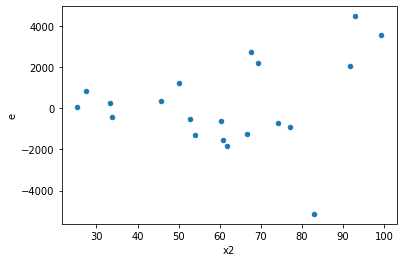

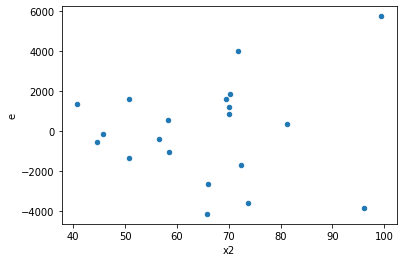

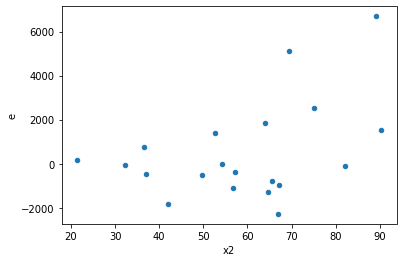

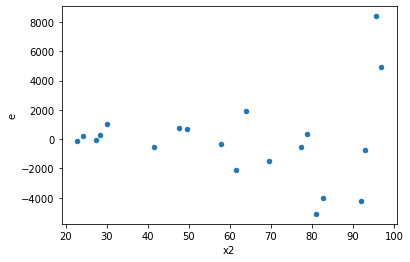

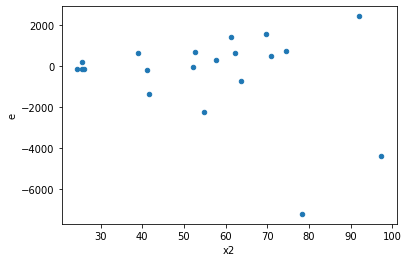

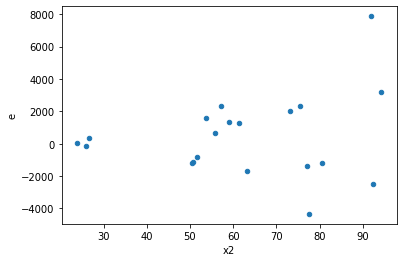

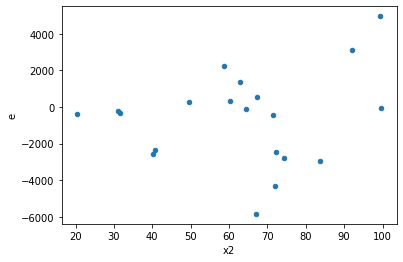

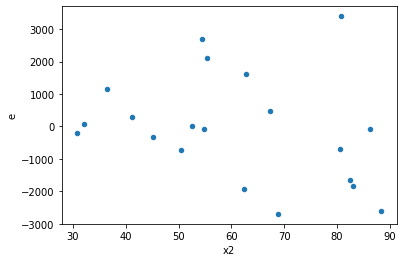

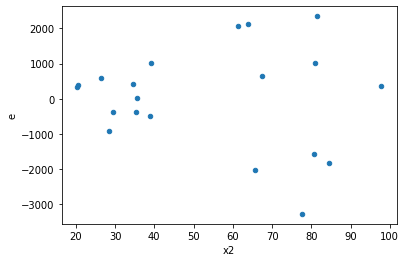

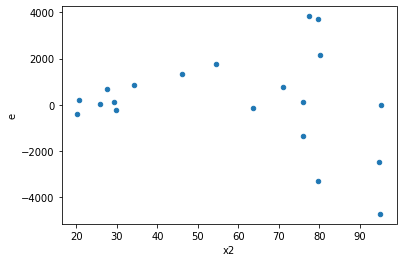

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,12.0,4.0,18353731.62686195,29674970.821522478,1529477.635571829,7418742.7053806195,4.8505074757807485,0.1398491232834318,0.9300754383582841,0.0699245616417159,Reject005=1 : Homoscedasticity
1.0,7.0,9.0,19086425.432652198,72594918.98048665,2726632.2046645996,8066102.10894296,2.9582655464656495,0.1327329912548747,0.9336335043725627,0.06636649562743735,Reject005=1 : Homoscedasticity
2.0,8.0,8.0,4552665.271641691,52819642.3752334,569083.1589552114,6602455.296904175,11.601916509048914,0.0022811300482865615,0.9988594349758567,0.0011405650241432808,Reject005=0 : Heteroscedasticity
4.0,11.0,5.0,7714904.123347625,68669531.38800214,701354.9203043296,13733906.277600428,19.581963254269404,0.004174176545357788,0.9979129117273211,0.002087088272678894,Reject005=0 : Heteroscedasticity
5.0,7.0,9.0,19291761.59243766,68319890.38172877,2755965.9417768084,7591098.931303197,2.754424071876996,0.15900164348826862,0.9204991782558657,0.07950082174413431,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,39706492.43536712,44018711.95237174,4963311.55442089,5502338.994046467,1.1086023784151648,0.8876324383882839,0.5561837808058581,0.44381621919414194,Reject005=1 : Homoscedasticity
7.0,7.0,9.0,7789112.307684507,35234027.266722366,1112730.3296692153,3914891.918524707,3.518275555307726,0.08333659408299265,0.9583317029585037,0.04166829704149633,Reject005=1 : Homoscedasticity
8.0,7.0,9.0,3655745.2600830407,12776729.361630851,522249.3228690058,1419636.5957367613,2.7183119892581353,0.1642788298656903,0.9178605850671548,0.08213941493284516,Reject005=1 : Homoscedasticity
9.0,7.0,9.0,3085136.8831026377,54247985.68598757,440733.84044323396,6027553.96510973,13.67617689408189,0.0007722274188388667,0.9996138862905806,0.00038611370941943335,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,4.0,18353731.62686195,29674970.821522478,1529477.635571829,7418742.7053806195,4.8505074757807485,0.1398491232834318,Reject005=1 : Homoscedasticity
1.0,7.0,9.0,19086425.432652198,72594918.98048665,2726632.2046645996,8066102.10894296,2.9582655464656495,0.1327329912548747,Reject005=1 : Homoscedasticity
2.0,8.0,8.0,4552665.271641691,52819642.3752334,569083.1589552114,6602455.296904175,11.601916509048914,0.0022811300482865615,Reject005=0 : Heteroscedasticity
3.0,9.0,7.0,50984322.37542003,13293282.913855733,5664924.7083800025,1899040.4162651047,0.3352278298519828,0.12990598318009455,Reject005=1 : Homoscedasticity
4.0,11.0,5.0,7714904.123347625,68669531.38800214,701354.9203043296,13733906.277600428,19.581963254269404,0.004174176545357788,Reject005=0 : Heteroscedasticity
5.0,7.0,9.0,19291761.59243766,68319890.38172877,2755965.9417768084,7591098.931303197,2.754424071876996,0.15900164348826862,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,39706492.43536712,44018711.95237174,4963311.55442089,5502338.994046467,1.1086023784151648,0.8876324383882839,Reject005=1 : Homoscedasticity
7.0,7.0,9.0,7789112.307684507,35234027.266722366,1112730.3296692153,3914891.918524707,3.518275555307726,0.08333659408299265,Reject005=1 : Homoscedasticity
8.0,7.0,9.0,3655745.2600830407,12776729.361630851,522249.3228690058,1419636.5957367613,2.7183119892581353,0.1642788298656903,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      504
Reject005=0 : Heteroscedasticity    496
Name: Result_test, dtype: int64